In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

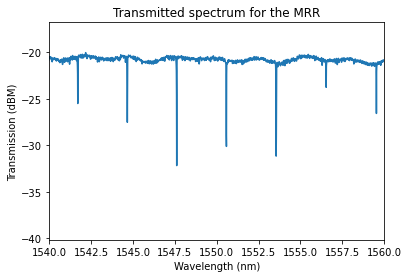

FSR: 2.97 nm
FWHM: 0.01 nm
Central Wavelength: 1547.61 nm
Q-Factor: 154761.00 nm
ng: 3.21
losses: 0.42 cm^-1


In [143]:
# Import the data from csv file

data = pd.read_csv('Ring_10E_13W_combined.csv', header=None, names=['wavelength', 'channel_1'], skiprows=1)

# Extract data as arrays

wavelength = data['wavelength'].values
transmission = data['channel_1'].values

plt.plot(wavelength, transmission)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmission (dBM)')
plt.title(f'Transmitted spectrum for the MRR')
plt.xlim(1540,1560)
plt.show()

# Identify transmission valleys

deriv = np.gradient(transmission)
valleys = (np.diff(np.sign(np.diff(deriv))) > 0).nonzero()[0] + 1

wavelength_range = (1540, 1560)
valleys = valleys[(wavelength[valleys] >= wavelength_range[0]) & (wavelength[valleys] <= wavelength_range[1])]

# Get the average Free spectral range (FSR)

if len(valleys) >= 2:
    
    fsr = np.diff(wavelength[valleys])
    valleys = valleys[transmission[valleys] <= -25]
    fsr_list = []
    
    for i in range(len(valleys) - 1):
        fsr = np.diff(wavelength[valleys[i:i+2]])[0]
        if fsr > 1:
            fsr_list.append(fsr)

    if len(fsr_list) >= 1:
        avg_fsr = np.mean(fsr_list)
    else:
        print("Could not find at least two valleys with FSR > 1 nm in the transmission data.")

    # Print the remaining valleys and FSRs
    if len(valleys) >= 2:
        fsr = np.diff(wavelength[valleys])
        


# transmitted power in mW

transmission = 10**(data['channel_1'].values/10)

# Isolate one resonance

min_wavelength = 1546
max_wavelength = 1548
indices = np.where((wavelength >= min_wavelength) & (wavelength <= max_wavelength))[0]
wavelength = wavelength[indices]
transmission = transmission[indices]

# Find resonant valley 

index = np.argmin(np.abs(wavelength - 1560))
valley_index = np.argmin(transmission[max(0, index-50):min(index+50, len(transmission)-1)]) + max(0, index-50)
valley_wavelength = wavelength[valley_index]
valley_channel_1 = transmission[valley_index]


# Calculate FWHM at the resonant valley

half_power = (valley_channel_1 - 0.000001) / 2
half_power_indices = np.where(transmission > half_power)[0]
fwhm_wavelength_left = np.interp(half_power, transmission[:valley_index][::-1], wavelength[:valley_index][::-1])
fwhm_wavelength_right = np.interp(half_power, transmission[valley_index:], wavelength[valley_index:])
fwhm = fwhm_wavelength_right - fwhm_wavelength_left

# Calculate central wavelength of the valley

central_wavelength_indices = np.where(transmission == valley_channel_1)[0]
central_wavelength_index = central_wavelength_indices[len(central_wavelength_indices) // 2]
central_wavelength = wavelength[central_wavelength_index]

#Calculate Q-factor, group index (ng) and Losses

ring_radius = 40 * (10 ** -6) #ring radius in m
Q_factor = central_wavelength/fwhm
ng = ((central_wavelength * 10 ** (-9)) ** 2)/(2*np.pi*ring_radius*avg_fsr*(10**-9))
losses = (np.pi*ng)/(Q_factor*(central_wavelength * 10 ** (-7)))

# Print results

print("FSR: {:.2f} nm".format(avg_fsr))
print("FWHM: {:.2f} nm".format(fwhm))
print("Central Wavelength: {:.2f} nm".format(central_wavelength))
print('Q-Factor: {:.2f} nm'.format(Q_factor))
print('ng: {:.2f}'.format(ng))
print('losses: {:.2f} cm^-1'.format(losses))


